In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<Axes: xlabel='Age', ylabel='Income($)'>

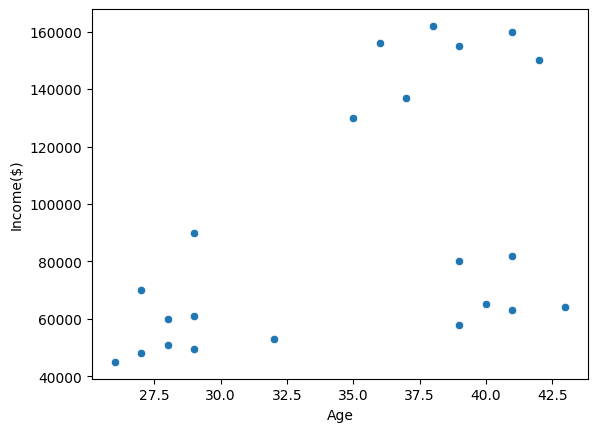

In [24]:
sns.scatterplot(data = df, x = 'Age', y = 'Income($)')

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(pd.DataFrame(df['Income($)']))

<Axes: xlabel='Age', ylabel='Income($)'>

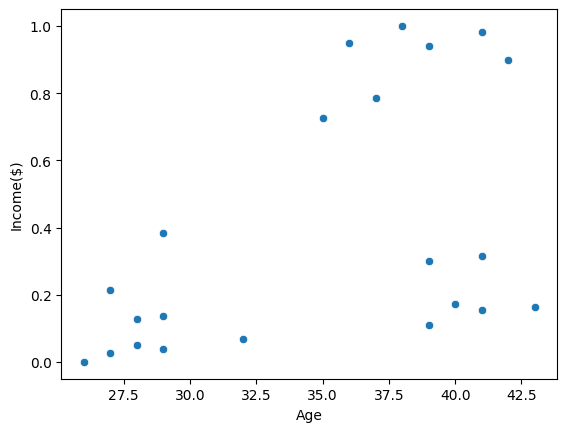

In [26]:
sns.scatterplot(data = df, x = 'Age', y = 'Income($)')

In [33]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters= 3)

y_pred = km.fit_predict(df[['Age', 'Income($)']])

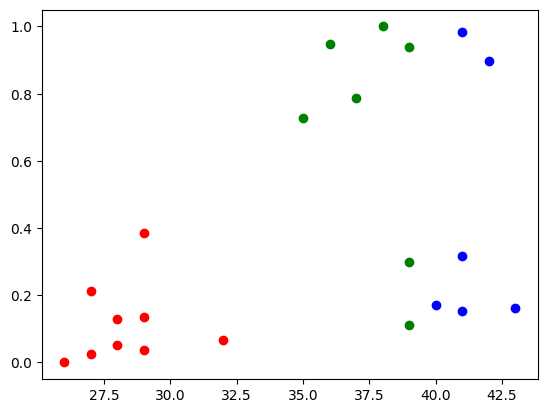

In [35]:
df['cluster'] = y_pred

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'blue')

plt.show()

In [39]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
    
sse

[734.1763833270243,
 92.54628677464531,
 46.6383807181528,
 31.51079322900904,
 20.23899785716025,
 10.600399347407894,
 16.085613144373827,
 6.5390654296637205,
 5.584217254730076]

In [ ]:
sns.lineplot(x= k_rng, y= sse)